In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [213]:
from math import cos, pi
import numpy
def hump(t):
    if t < -1 or t > 1:
        return 0
    return (t+1)**4 * (t-1)**4
(400, 320, 0.5)
humps = [ (100, 50, 0.1), (160, 100, 0.25), (270, 200, 0.6), 
          (390, 200, 0.4), (390, 200, 0.4), (560, 250, 0.2) ]
def sumhump(t, humps):
    return sum(hump((t-t0)/tr)*th  for t0, tr, th in humps)

# make the data structure of time, position and velocity
ts = numpy.arange(0, 0.8, 0.0001)
xs = [sumhump(t*1000, humps)*0.3  for t in ts]
px = pandas.DataFrame({"t":ts, "x":xs})
px["v"] = (px.x.diff()/px.t.diff()).shift(-1)
px["a"] = (px.v.diff()/px.t.diff()).shift(-1)
px = px.dropna()

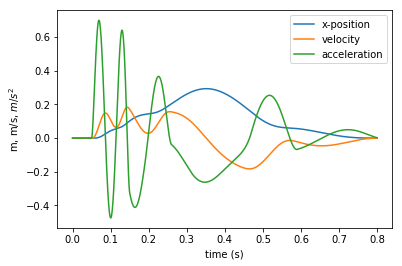

In [214]:
plt.plot(px.t, px.x, label="x-position")
plt.plot(px.t, px.v*0.1, label="velocity")
plt.plot(px.t, px.a*0.01, label="acceleration")
plt.xlabel("time (s)")
plt.ylabel("m, m/s, $m/s^2$")
plt.legend()


In [255]:
# This gets a series of acceleration samples from the motion at a precision
def samplecurve(subsamplerate, startsample, precision):
    spx = px.iloc[list(range(startsample, len(px), subsamplerate))]
    ts = list(spx.t)
    accs = [ round(a/precision)*precision  for a in spx.a ]
    return pandas.DataFrame({"t":ts, "a":accs})

#samplecurve(subsamplerate=220, startsample=45, precision=0.01)


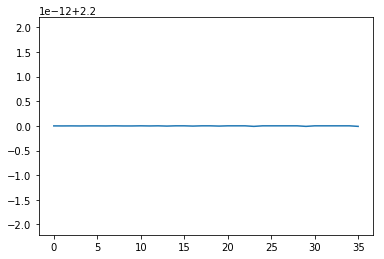

In [236]:
k = sacc.t.diff().shift(-1).dropna()


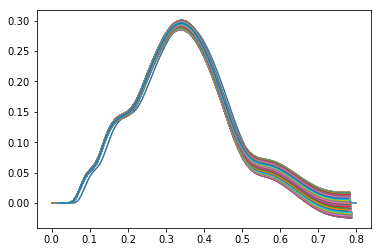

In [263]:
plt.plot(px.t, px.x, label="x-position")
for startsample in range(10, 210, 2):
    sacc = samplecurve(subsamplerate=110, startsample=startsample, precision=0.01)
    sacc["v"] = (sacc.a*sacc.t.diff().shift(-1)).cumsum()
    sacc["x"] = (sacc.v*sacc.t.diff().shift(-1)).cumsum()
    plt.plot(sacc.t, sacc.x)


In [264]:
sacc.v

0     0.00000
1     0.00000
2     0.00000
3     0.11748
4     0.81510
5     1.43572
6     1.40250
7     0.89815
8     0.59884
9     0.96096
10    1.66276
11    1.81126
12    1.42032
13    0.96767
14    0.57288
15    0.33198
16    0.30305
17    0.50963
18    0.88033
19    1.27336
20    1.53351
21    1.58246
22    1.53373
23    1.45453
24    1.33628
25    1.17436
26    0.96822
27    0.72336
28    0.45199
29    0.16654
       ...   
41   -1.76319
42   -1.62063
43   -1.40767
44   -1.14763
45   -0.86823
46   -0.59983
47   -0.37180
48   -0.20933
49   -0.12804
50   -0.12848
51   -0.18909
52   -0.26081
53   -0.32307
54   -0.37378
55   -0.41140
56   -0.43483
57   -0.44352
58   -0.43780
59   -0.41844
60   -0.38687
61   -0.34518
62   -0.29590
63   -0.24200
64   -0.18689
65   -0.13376
66   -0.08591
67   -0.04598
68   -0.01606
69    0.00308
70        NaN
Name: v, Length: 71, dtype: float64